# Getting Started

## Using Cameras

In [1]:
import cameratransform as ct

# intrinsic camera parameters
f = 6.2    # in mm
sensor_size = (6.17, 4.55)    # in mm
image_size = (3264, 2448)    # in px

# initialize the camera
cam = ct.Camera(ct.RectilinearProjection(focallength_mm=f, 
                                         sensor=sensor_size,
                                         image=image_size),
               ct.SpatialOrientation(elevation_m=10,
                                     tilt_deg=45))

In [2]:
cam.elevation_m = 34.027
cam.tilt_deg = 83.307926
cam.roll_deg = -1.916219

In [3]:
cam.imageFromSpace([3.17, 8, 0])

array([ 2807.03150016, 10239.20837453])

In [4]:
cam.imageFromSpace([[3.17, 8, 0],
                    [3.17, 8, 10],
                    [4.12, 10, 0],
                    [4.12, 10, 10]])

array([[ 2807.03150016, 10239.20837453],
       [ 2833.09367445,  8187.05449921],
       [ 2861.32478822,  8888.15694679],
       [ 2888.29025648,  7032.51227791]])

In [5]:
cam.spaceFromImage([2445, 1569])

array([ 36.26041556, 145.50056995,   0.        ])

In [6]:
cam.spaceFromImage([2445, 1569], X=10)

array([10.        , 40.12655887, 24.64293766])

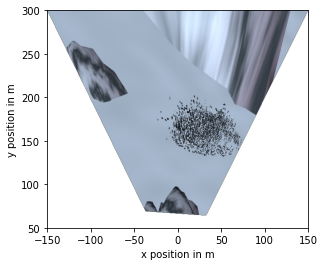

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
# display a top view of the image
im = plt.imread("CameraImage.jpg")
top_im = cam.getTopViewOfImage(im, [-150, 150, 50, 300], scaling=0.5, do_plot=True)
plt.xlabel("x position in m")
plt.ylabel("y position in m");

## Fitting

In [8]:
import cameratransform as ct
import numpy as np
import matplotlib.pyplot as plt

im = plt.imread("CameraImage2.jpg")
camera = ct.Camera(ct.RectilinearProjection(focallength_px=3863.64, image=im))

In [9]:
feet = np.array([[1968.73191418, 2291.89125757], [1650.27266115, 2189.75370951], [1234.42623164, 2300.56639535], [ 927.4853119 , 2098.87724083], [3200.40162013, 1846.79042709], [3385.32781138, 1690.86859965], [2366.55011031, 1446.05084045], [1785.68269333, 1399.83787022], [ 889.30386193, 1508.92532749], [4107.26569943, 2268.17045783], [4271.86353701, 1889.93651518], [4007.93773879, 1615.08452509], [2755.63028039, 1976.00345458], [3356.54352228, 2220.47263494], [ 407.60113016, 1933.74694958], [1192.78987735, 1811.07247163], [1622.31086201, 1707.77946355], [2416.53943619, 1775.68148688], [2056.81514201, 1946.4146027 ], [2945.35225814, 1617.28314118], [1018.41322935, 1499.63957113], [1224.2470045 , 1509.87120351], [1591.81599888, 1532.33339856], [1701.6226147 , 1481.58276189], [1954.61833888, 1405.49985098], [2112.99329583, 1485.54970652], [2523.54106057, 1534.87590467], [2911.95610793, 1448.87104305], [3330.54617013, 1551.64321531], [2418.21276457, 1541.28499777], [1771.1651859 , 1792.70568482], [1859.30409241, 1904.01744759], [2805.02878512, 1881.00463747], [3138.67003071, 1821.05082989], [3355.45215983, 1910.47345815], [ 734.28038607, 1815.69614796], [ 978.36733356, 1896.36507827], [1350.63202232, 1979.38798787], [3650.89052382, 1901.06620751], [3555.47087822, 2332.50027861], [ 865.71688784, 1662.27834394], [1115.89438493, 1664.09341647], [1558.93825646, 1671.02167477], [1783.86089289, 1679.33599881], [2491.01579305, 1707.84219953], [3531.26955813, 1729.08486338], [3539.6318973 , 1776.5766387 ], [4150.36451427, 1840.90968707], [2112.48684812, 1714.78834459], [2234.65444134, 1756.17059266]])
heads = np.array([[1968.45971142, 2238.81171866], [1650.27266115, 2142.33767714], [1233.79698528, 2244.77321846], [ 927.4853119 , 2052.2539967 ], [3199.94718145, 1803.46727222], [3385.32781138, 1662.23146061], [2366.63609066, 1423.52398752], [1785.68269333, 1380.17615549], [ 889.30386193, 1484.13026407], [4107.73533808, 2212.98791584], [4271.86353701, 1852.85753597], [4007.93773879, 1586.36656606], [2755.89171994, 1938.22544024], [3355.91105749, 2162.91833832], [ 407.60113016, 1893.63300333], [1191.97371829, 1777.60995028], [1622.11915337, 1678.63975025], [2416.31761434, 1743.29549618], [2056.67597009, 1910.09072955], [2945.35225814, 1587.22557592], [1018.69818061, 1476.70099517], [1224.55272475, 1490.30510731], [1591.81599888, 1510.72308329], [1701.45016126, 1460.88834824], [1954.734384  , 1385.54008964], [2113.14023137, 1465.41953732], [2523.54106057, 1512.33125811], [2912.08384338, 1428.56110628], [3330.40769371, 1527.40984208], [2418.21276457, 1517.88006678], [1770.94524662, 1761.25436746], [1859.30409241, 1867.88794433], [2804.69006305, 1845.10009734], [3138.33130864, 1788.53351052], [3355.45215983, 1873.21402971], [ 734.49504829, 1780.27688131], [ 978.1022294 , 1853.9484135 ], [1350.32991656, 1938.60371039], [3650.89052382, 1863.97713098], [3556.44897343, 2278.37901052], [ 865.41437575, 1633.53969555], [1115.59187284, 1640.49747358], [1558.06918395, 1647.12218082], [1783.86089289, 1652.74740383], [2491.20950909, 1677.42878081], [3531.11177814, 1696.89774656], [3539.47411732, 1745.49398176], [4150.01023142, 1803.35570469], [2112.84669376, 1684.92115685], [2234.65444134, 1724.86402238]])

camera.addObjectHeightInformation(feet, heads, 0.75, 0.03)

In [10]:
horizon = np.array([[418.2195998, 880.253216], [3062.54424509, 820.94125636]])
camera.addHorizonInformation(horizon, uncertainty=10)

In [11]:
camera.setGPSpos("66°39'53.4\"S  140°00'34.8\"")

lm_points_px = np.array([[2091.300935, 892.072126], [2935.904577, 824.364956]])
lm_points_gps = ct.gpsFromString([("66°39'56.12862''S  140°01'20.39562''", 13.769),
                                  ("66°39'58.73922''S  140°01'09.55709''", 21.143)])
lm_points_space = camera.spaceFromGPS(lm_points_gps)

camera.addLandmarkInformation(lm_points_px, lm_points_space, [3, 3, 5])

In [12]:
trace = camera.metropolis([
        ct.FitParameter("elevation_m", lower=0, upper=100, value=20),
        ct.FitParameter("tilt_deg", lower=0, upper=180, value=80),
        ct.FitParameter("heading_deg", lower=-180, upper=180, value=90),
        ct.FitParameter("roll_deg", lower=-180, upper=180, value=0)
        ], iterations=1e4)

100%|██████████| 10000/10000 [00:39<00:00, 255.79it/s, acc_rate=0.128, factor=0.0266]

      elevation_m   tilt_deg  heading_deg  roll_deg   probability
0       21.665337  81.346279   101.617372 -2.281913 -18238.261616
1       21.651165  81.354980   101.634098 -2.254086 -18233.284405
2       21.651165  81.354980   101.634098 -2.254086 -18233.284405
3       21.651165  81.354980   101.634098 -2.254086 -18233.284405
4       21.651165  81.354980   101.634098 -2.254086 -18233.284405
...           ...        ...          ...       ...           ...
8994    20.693984  81.475563   101.621223 -2.330351 -18213.063424
8995    20.693984  81.475563   101.621223 -2.330351 -18213.063424
8996    20.693984  81.475563   101.621223 -2.330351 -18213.063424
8997    20.693984  81.475563   101.621223 -2.330351 -18213.063424
8998    20.693984  81.475563   101.621223 -2.330351 -18213.063424

[8999 rows x 5 columns]


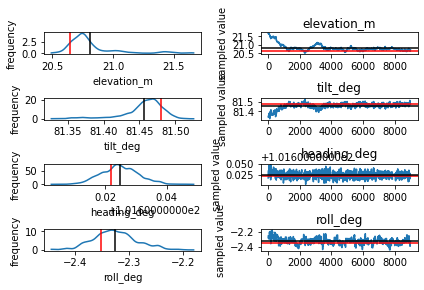

In [13]:
camera.plotTrace()
plt.tight_layout()

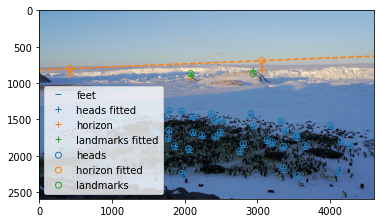

In [14]:
camera.plotFitInformation(im)
plt.legend();